In [ ]:
import gzip
import json
import string
import collections
from gensim.models import Word2Vec
import torch
import torch.nn as nn
import random
import torch.optim as optim

import nltk
from nltk.corpus import stopwords

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f = gzip.open('/content/drive/MyDrive/CSE256_summary/cs_dataset/renttherunway_final_data.json.gz')
dataset = []
cnt=0
for l in f:
  dataset.append(json.loads(l))

In [ ]:
dataset[0]

{'fit': 'fit',
 'user_id': '420272',
 'bust size': '34d',
 'item_id': '2260466',
 'weight': '137lbs',
 'rating': '10',
 'rented for': 'vacation',
 'review_text': "An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",
 'body type': 'hourglass',
 'review_summary': 'So many compliments!',
 'category': 'romper',
 'height': '5\' 8"',
 'size': 14,
 'age': '28',
 'review_date': 'April 20, 2016'}

In [ ]:
raw_reviews = []
raw_summaries = []
for data in dataset:
  raw_reviews.append(data['review_text'])
  raw_summaries.append(data['review_summary'])
print(raw_reviews[0])
print(raw_summaries[0])

An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.
So many compliments!


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
class wv:
    def __init__(self):
        self.word2index = {"<SOS>":0, "<EOS>":1, "<PAD>":2} # word -> index
        self.word2count = {} # word -> frequency. This is only used for statistical work.
        self.index2word = {0:"<SOS>", 1:"<EOS>", 2:"<PAD>"} # index -> word
        self.n_words = 3 # <sos>, <eos>, <pad>

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [ ]:
alltokens = [['<start>'], ['<end>'], ['<pad>']]
reviews = []
summaries = []
punctuations = set(string.punctuation)
stop_words = set(stopwords.words('english'))

for i in range(len(raw_reviews)):
  r = raw_reviews[i]
  s = raw_summaries[i]

  r = ''.join([c for c in r.lower() if c not in punctuations])
  s = ''.join([c for c in s.lower() if c not in punctuations])

  tokens = []
  for word in r.split(' '):
    if (word not in punctuations) and (word != ''):
      #print(word)
      word = word.lower()
      tokens.append(word)
  alltokens.append(list(tokens))
  reviews.append(' '.join(tokens))

  tokens = []
  for word in s.split(' '):
    if (word not in punctuations) and (word != ''):
      #print(word)
      word = word.lower()
      tokens.append(word)
  alltokens.append(list(tokens))
  summaries.append(' '.join(tokens))

In [ ]:
reviews[3]

'i rented this for my companys black tie awards banquet i liked that this dress was short but was a little fancier with the sequins i generally dont care for long dresses i would describe the color as more rose gold than yellow gold i have blonde hair and fair skin and the color was very flattering this is a very forgiving dress its form fitting without making you feel like youre squeezed into it i would rent this one again highly recommend'

In [ ]:
summaries[3]

'dress arrived on time and in perfect condition'

In [ ]:
source = wv()
target = wv()
pairs = []
for s, t in zip(reviews, summaries):
  if len(s.split(' ')) <50: continue
  source.addSentence(s)
  target.addSentence(t)
  full=[s,t]
  pairs.append(full)
  # break

[('dress', 191649), ('fit', 57589), ('size', 56745), ('would', 52983), ('wear', 46645), ('wore', 42279), ('little', 39173), ('perfect', 34181), ('great', 32830), ('comfortable', 29162), ('compliments', 28463), ('loved', 26690), ('like', 26263), ('im', 25066), ('bra', 24927), ('didnt', 24584), ('bit', 24426), ('definitely', 23007), ('night', 22721), ('got', 22655), ('really', 22535), ('long', 22415), ('back', 22329), ('length', 22204), ('4', 20892), ('top', 19442), ('heels', 18980), ('felt', 18797), ('wedding', 18739), ('one', 18315), ('color', 18180), ('fabric', 18017), ('also', 17557), ('rent', 17472), ('wearing', 17419), ('could', 17306), ('tight', 17116), ('small', 16532), ('recommend', 16499), ('beautiful', 16330), ('well', 16261), ('even', 16075), ('6', 15722), ('short', 15661), ('2', 15364), ('ordered', 14681), ('still', 14642), ('look', 14586), ('waist', 14218), ('received', 14047), ('flattering', 14040), ('material', 13974), ('many', 13676), ('made', 13569), ('rented', 13446), 

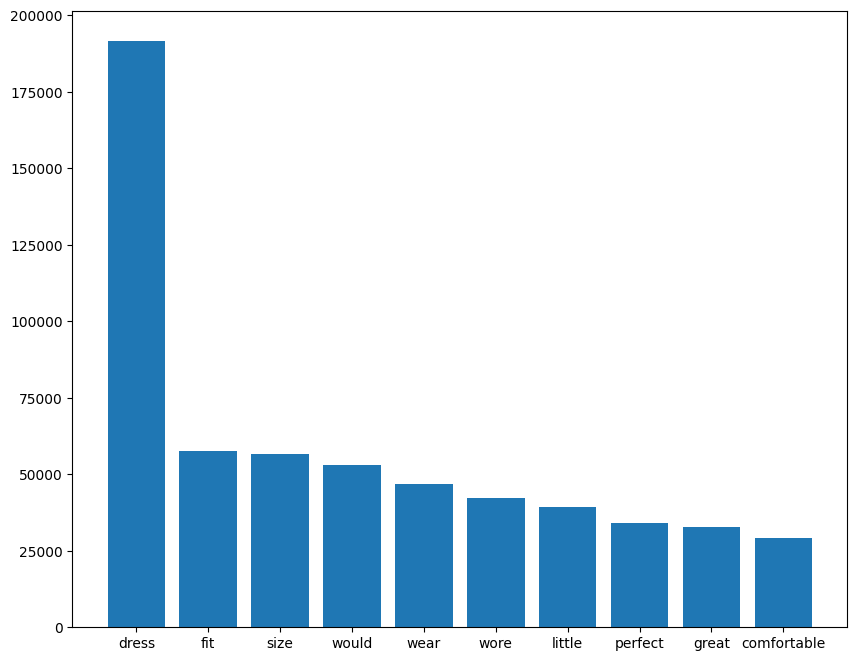

In [ ]:
import matplotlib.pyplot as plt
# print(source.word2count)
freq_input = []

word_count = [(k,v) for k,v in source.word2count.items() if k not in stop_words]

word_count.sort(key = lambda x:x[1], reverse = True)

print(word_count)

top_10_word = word_count[:10]

data = [count[1] for count in top_10_word]
name = [count[0] for count in top_10_word]

plt.figure(figsize = (10,8))
plt.bar(range(len(data)), data)
plt.xticks(range(len(data)), name)
plt.tick_params(labelsize=10)


[('dress', 40682), ('perfect', 10989), ('beautiful', 10065), ('great', 9944), ('compliments', 9005), ('wedding', 7132), ('comfortable', 6614), ('color', 5813), ('loved', 5568), ('fun', 5160), ('fit', 4840), ('gorgeous', 4505), ('night', 4174), ('wore', 4088), ('many', 3984), ('felt', 3748), ('flattering', 3744), ('party', 3386), ('got', 3291), ('classy', 3227), ('love', 3122), ('cute', 3077), ('sexy', 3073), ('amazing', 2954), ('review', 2912), ('like', 2738), ('received', 2605), ('elegant', 2585), ('stunning', 2447), ('black', 2283), ('event', 2207), ('stylist', 2195), ('wear', 2185), ('pretty', 2100), ('rtr', 2049), ('formal', 1977), ('super', 1906), ('work', 1730), ('unique', 1661), ('made', 1659), ('tie', 1581), ('summer', 1533), ('absolutely', 1507), ('easy', 1423), ('lots', 1385), ('really', 1201), ('gown', 1185), ('long', 1158), ('classic', 1134), ('nice', 1114), ('tons', 1112), ('feel', 1095), ('dinner', 1085), ('rented', 1048), ('didnt', 1044), ('runs', 1042), ('comfy', 1040),

([<matplotlib.axis.XTick at 0x7efdb1387310>,
 [Text(0, 0, 'dress'),
  Text(1, 0, 'perfect'),
  Text(2, 0, 'beautiful'),
  Text(3, 0, 'great'),
  Text(4, 0, 'compliments'),
  Text(5, 0, 'wedding'),
  Text(6, 0, 'comfortable'),
  Text(7, 0, 'color'),
  Text(8, 0, 'loved'),
  Text(9, 0, 'fun')])

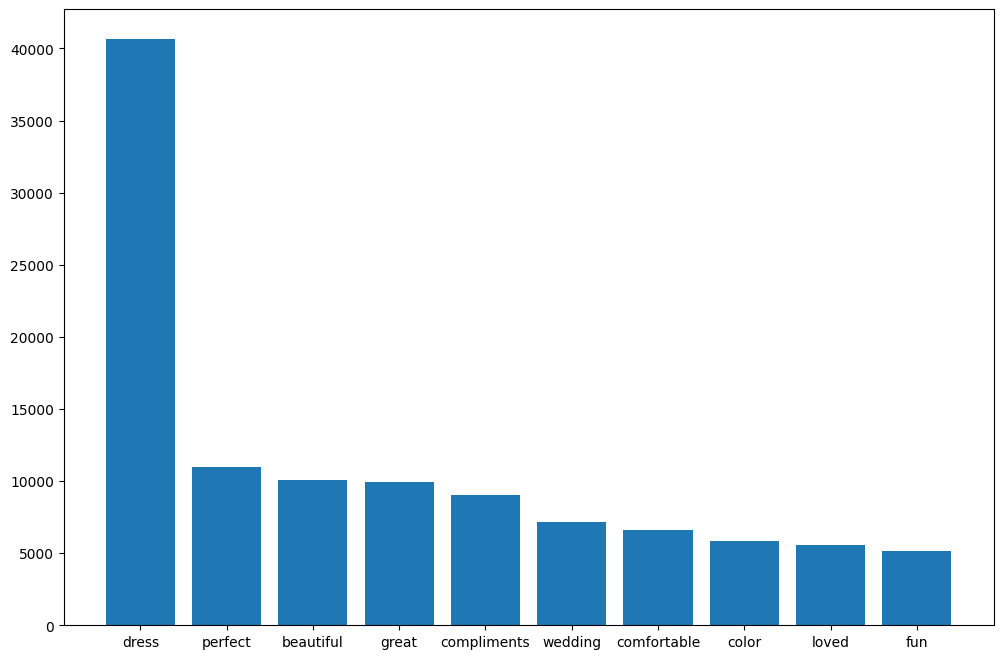

In [ ]:
freq_input = []

word_count = [(k,v) for k,v in target.word2count.items() if k not in stop_words]

word_count.sort(key = lambda x:x[1], reverse = True)

print(word_count)

top_10_word = word_count[:10]

data = [count[1] for count in top_10_word]
name = [count[0] for count in top_10_word]

plt.figure(figsize = (12,8))
plt.bar(range(len(data)), data)
plt.xticks(range(len(data)), name)
#plt.tick_params(labelsize=12)

In [ ]:
pairs[100]

['i wore this dress to my school of pharmacy centennial gala it definitely stood out and i received so many compliments from colleagues and strangers many commented that it was their favorite dress of the evening the dress was in excellent condition and the color was gorgeous the back was my favorite part i usually wear a size 2 but the 0 fit like a glove plenty of room and hugs every curve i loved this dress and would recommend it to anyone',
 'absolutely gorgeous compliments all night long']

In [ ]:
len(pairs)

96126

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils import data
from torch.utils.data import DataLoader
import os
import gensim
import string
from torch.nn import Embedding

class Summary_Loader(data.Dataset):
    def __init__(self, pairs, source, target,
                 review_length = 100, summary_length = 20):
        super().__init__()

        # self.reviews = reviews
        # self.summaries = summaries
        self.pairs = pairs

        self.review_length = review_length
        self.summary_length = summary_length

        self.source = source
        self.target = target

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, index):

        review = self.pairs[index][0].split(' ')
        summary = self.pairs[index][1].split(' ')
        # print(summary)

        review_tensor = np.zeros(shape = (self.review_length))
        summary_tensor = np.zeros(shape = (self.summary_length + 1))

        for i in range(self.review_length):
          if i < len(review):
            review_tensor[i] = self.source.word2index[review[i]]
          else:
            review_tensor[i] = self.source.word2index["<PAD>"]

        summary_tensor[0] = self.target.word2index["<SOS>"]
        for i in range(1, self.summary_length + 1):
          if i - 1 < len(summary):
            summary_tensor[i] = self.target.word2index[summary[i - 1]]
          elif i - 1 == len(summary):
            summary_tensor[i] = self.target.word2index["<EOS>"]
          else:
            summary_tensor[i] = self.target.word2index["<PAD>"]

        return torch.tensor(review_tensor).long(), torch.tensor(summary_tensor).long()


In [ ]:
summary_loader = Summary_Loader(pairs, source, target)

In [ ]:
from tqdm import tqdm

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()

        self.hid_dim = hid_dim
        self.n_layers = n_layers

        self.embedding = nn.Embedding(input_dim, emb_dim)

        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout)

        self.dropout = nn.Dropout(dropout)

    def forward(self, src):

        embedded = self.dropout(self.embedding(src))

        outputs, (hidden, cell) = self.rnn(embedded)

        return hidden, cell

In [ ]:
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()

        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers

        self.embedding = nn.Embedding(output_dim, emb_dim)

        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout)

        self.fc = nn.Linear(hid_dim, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, cell):

        input = input.unsqueeze(0)

        embedded = self.dropout(self.embedding(input))

        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))

        prediction = self.fc(output.squeeze(0))

        return prediction, hidden, cell

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg, teacher_force_prob = 0.5):

        batch_size, trg_len = trg.shape[1], trg.shape[0]
        output_length = self.decoder.output_dim

        outputs = torch.zeros(trg_len, batch_size, output_length).to(self.device)

        hidden, cell = self.encoder(src)

        input = trg[0,:]

        for i in range(1, trg_len):

            output, hidden, cell = self.decoder(input, hidden, cell)

            outputs[i] = output

            teacher_force = random.random() < teacher_force_prob

            top1 = output.argmax(1)

            input = trg[i] if teacher_force else top1

        return outputs

NameError: ignored

In [ ]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.0 MB/s eta 0:00:00


In [ ]:
from tqdm import tqdm
import torch.optim as optim
from einops import rearrange
PAD_ID = 2

In [ ]:
# INPUT_DIM = len(SRC.vocab)
# OUTPUT_DIM = len(TRG.vocab)
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
INPUT_DIM = len(source.word2index)
OUTPUT_DIM = len(target.word2index)
print(INPUT_DIM, OUTPUT_DIM)

ENC_EMB_DIM = 100
DEC_EMB_DIM = 100
HID_DIM = 512
N_LAYERS = 4
ENC_DROPOUT = 0.5
DEC_DROPOUT = 0.5

enc = Encoder(INPUT_DIM, ENC_EMB_DIM, HID_DIM, N_LAYERS, ENC_DROPOUT)
dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HID_DIM, N_LAYERS, DEC_DROPOUT)

trainset, valset = torch.utils.data.random_split(summary_loader, [0.95, 0.05], torch.Generator().manual_seed(42))
print(len(trainset), len(valset))
trainloader = DataLoader(trainset, batch_size = 128, shuffle = True, num_workers = 0)
valloader = DataLoader(valset, batch_size = 1, shuffle = True, num_workers = 0)

model = Seq2Seq(enc, dec, device).to(device)
optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss(ignore_index = PAD_ID)
trainloader = DataLoader(dataset= summary_loader, batch_size= 256, shuffle= True, num_workers = 0, drop_last=True)

50892 11474
91320 4806


In [ ]:
ckpt = torch.load("/content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl", map_location='cpu')
model.load_state_dict(ckpt['model'])

<All keys matched successfully>

In [ ]:
def online_eval(model, trainloader):
  model = model.eval()
  tmp=[]
  tmp1=[]
  tmp2 =[]
  with tqdm(total = len(trainloader)) as pbar:
      for i, batch in enumerate(trainloader):
        input, label = batch
        input, label = input.to(device), label.to(device)
        # assert input.shape == (32, 216, 100) and label.shape == (32, 30, 100)
        input, label = rearrange(input, 'b l -> l b'), rearrange(label, 'b l -> l b')
        pred = model(input, label, teacher_forcing_ratio = 0.0)

        pred = pred.permute(1, 0, 2)

        # pred = pred.cpu().detach().numpy()

        one_sample = pred[0]

        sf = nn.Softmax(dim = -1)
        one_sample = sf(one_sample)

        #print(one_sample.shape)
        one_sample = torch.argmax(one_sample, dim = -1)

        #print(one_sample.shape)
        #print(one_sample)

        one_sample = one_sample.cpu().detach().numpy()
        word = []
        for i in range(20):
          w = target.index2word[one_sample[i]]
          word.append(w)

        print("translate", word)

        label = rearrange(label, 'l b -> b l')
        word_label = []
        one_label = label.cpu().detach().numpy()[0]
        #print(one_label.shape)
        for i in range(20):
          w = target.index2word[one_label[i]]
          word_label.append(w)
        print("ground truth", word_label)
        pbar.update(1)
        # print(input.shape, label.shape)
        break

In [ ]:
def save(path, model):
  ckpt = {
      'model' : model.state_dict(),
  }
  torch.save(ckpt, path)
  print("save {} successfully".format(path))

In [ ]:
def train(model, iterator, optimizer, criterion, clip = None):

    model.train()

    epoch_loss = 0

    for e in range(100):
      with tqdm(total = len(iterator), unit = 'batch') as pbar:
        for i, batch in enumerate(iterator):
            model.train()

            src, trg = batch
            src, trg = rearrange(src, 'b l -> l b'), rearrange(trg, 'b l -> l b')
            src, trg = src.to(device), trg.to(device)
            # print(src.shape, trg.shape)

            optimizer.zero_grad()

            output = model(src, trg)

            output_dim = output.shape[-1]

            output = output[1:].reshape(-1, output_dim)
            trg = trg[1:].reshape(-1)

            loss = criterion(output, trg)

            loss.backward()

            optimizer.step()

            epoch_loss += loss.item()

            pbar.set_postfix(loss=loss.item())
            pbar.update(1)

      save("/content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl", model)
      print('Finish epoch ', e)
      print("eval...training")
      online_eval(model = model, trainloader = iterator)
      print("eval...validation")
      online_eval(model = model, trainloader = valloader)

In [ ]:
train(model, trainloader, optimizer, criterion )

100%|██████████| 375/375 [05:00<00:00,  1.25batch/s, loss=5.2]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  0
eval...training


  0%|          | 1/375 [00:00<02:02,  3.06it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'stylist', 'review', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:38, 48.73it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', '<EOS>', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'was', 'complimented', 'on', 'the', 'color', 'all', 'night', 'however', 'the', 'zipper', 'wouldnt', 'stay', 'zipped', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:00<00:00,  1.25batch/s, loss=4.62]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  1
eval...training


  0%|          | 1/375 [00:00<02:02,  3.06it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', '<EOS>', 'comfortable', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'dress', 'but', 'very', 'tight', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.96it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'a', 'wedding', 'to', 'remember', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [04:59<00:00,  1.25batch/s, loss=4.47]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  2
eval...training


  0%|          | 1/375 [00:00<02:00,  3.11it/s]


translate ['<SOS>', 'i', 'was', 'a', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'it', 'was', 'just', 'ok', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:43, 46.56it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', 'dress', 'for', 'a', 'black', 'party', '<EOS>', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'wore', 'this', 'dress', 'for', 'our', 'engagement', 'pictures', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:00<00:00,  1.25batch/s, loss=4.56]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  3
eval...training


  0%|          | 1/375 [00:00<02:07,  2.93it/s]


translate ['<SOS>', 'i', 'up', '<EOS>', 'for', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'everything', 'was', 'perfect', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:39, 48.46it/s]


translate ['<SOS>', 'i', 'dress', 'and', 'fit', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'color', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [04:59<00:00,  1.25batch/s, loss=4.38]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  4
eval...training


  0%|          | 1/375 [00:00<02:07,  2.93it/s]


translate ['<SOS>', 'i', 'a', 'to', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'even', 'the', 'guy', 'pouring', 'wine', 'complimented', 'me', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.83it/s]


translate ['<SOS>', 'i', 'and', 'dress', 'a', 'formal', 'party', '<EOS>', '<EOS>', 'got', 'lots', 'to', 'wear', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'fun', 'dress', 'for', 'a', 'laid', 'back', 'wedding', 'that', 'you', 'want', 'to', 'look', 'put', 'together', 'for', '<EOS>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:00<00:00,  1.25batch/s, loss=4.17]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  5
eval...training


  0%|          | 1/375 [00:00<02:01,  3.07it/s]


translate ['<SOS>', 'i', 'and', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'chic', 'flattering', 'effortless', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.61it/s]


translate ['<SOS>', 'beautiful', 'team', 'review', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'rtr', 'team', 'review', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:00<00:00,  1.25batch/s, loss=4.47]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  6
eval...training


  0%|          | 1/375 [00:00<02:05,  2.99it/s]


translate ['<SOS>', 'i', 'and', 'dress', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'flowy', 'nice', 'fit', 'with', 'gorgeous', 'colors', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:46, 45.12it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', 'comfortable', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'great', 'dress', 'really', 'tight', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:00<00:00,  1.25batch/s, loss=4.17]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  7
eval...training


  0%|          | 1/375 [00:00<02:03,  3.03it/s]


translate ['<SOS>', 'i', 'dress', 'comfortable', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'classy', 'and', 'festive', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.81it/s]


translate ['<SOS>', 'great', 'dress', '<EOS>', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beach', 'wedding', 'on', 'cape', 'cod', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:00<00:00,  1.25batch/s, loss=4.43]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  8
eval...training


  0%|          | 1/375 [00:00<02:02,  3.05it/s]


translate ['<SOS>', 'great', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'for', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'dress', 'exactly', 'what', 'i', 'had', 'hoped', 'it', 'would', 'be', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.52it/s]


translate ['<SOS>', 'great', 'dress', 'loved', 'this', 'wear', 'it', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'not', 'that', 'i', 'would', 'rent', 'the', 'same', 'dress', 'again', 'but', 'it', 'is', 'fabulous', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:01<00:00,  1.25batch/s, loss=4.5]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  9
eval...training


  0%|          | 1/375 [00:00<02:06,  2.95it/s]


translate ['<SOS>', 'beautiful', 'dress', 'dress', 'for', 'a', 'wedding', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'the', 'perfect', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:43, 46.37it/s]


translate ['<SOS>', 'beautiful', 'for', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'holiday', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:01<00:00,  1.24batch/s, loss=4.08]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  10
eval...training


  0%|          | 1/375 [00:00<02:11,  2.85it/s]


translate ['<SOS>', 'great', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'detail', 'and', 'fun', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:38, 48.59it/s]


translate ['<SOS>', 'i', 'dress', 'and', 'color', '<EOS>', '<EOS>', 'like', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'ok', 'fit', 'beautiful', 'embroidery', 'casual', 'feel', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.98]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  11
eval...training


  0%|          | 1/375 [00:00<02:06,  2.97it/s]


translate ['<SOS>', 'i', 'dress', 'was', 'a', 'for', 'a', '<EOS>', 'it', 'was', 'perfectly', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'wore', 'this', 'dress', 'for', 'nye', 'and', 'it', 'fit', 'great', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:38, 48.60it/s]


translate ['<SOS>', 'i', 'dress', 'was', 'glove', '<EOS>', '<EOS>', 'dress', '<EOS>', 'was', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'felt', 'like', 'a', 'princess', 'in', 'this', 'gorgeous', 'blue', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=4.49]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  12
eval...training


  0%|          | 1/375 [00:00<02:05,  2.98it/s]


translate ['<SOS>', 'great', 'dress', '<EOS>', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'comfortable', 'beautiful', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.54it/s]


translate ['<SOS>', 'great', 'team', 'review', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'rtr', 'team', 'review', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=4.02]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  13
eval...training


  0%|          | 1/375 [00:00<02:04,  3.01it/s]


translate ['<SOS>', 'i', 'dress', 'this', 'dress', 'for', 'and', 'sexy', '<EOS>', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'for', 'dancing', 'soft', 'flowy', 'little', 'red', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:39, 48.43it/s]


translate ['<SOS>', 'i', 'dress', 'was', 'perfect', 'comfortable', 'and', 'i', '<EOS>', 'to', 'i', 'was', 'a', '<EOS>', 'the', '<EOS>', 'part', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'the', 'dress', 'was', 'very', 'comfortable', 'and', 'heavythick', 'enough', 'that', 'it', 'draped', 'well', 'and', 'hid', 'any', 'imperfections', '<EOS>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.69]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  14
eval...training


  0%|          | 1/375 [00:00<02:08,  2.92it/s]


translate ['<SOS>', 'i', 'dress', 'was', 'a', '<EOS>', 'i', '<EOS>', 'have', 'it', 'this', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'a', 'little', 'more', 'sexier', 'than', 'i', 'would', 'have', 'chosen', 'but', 'i', 'loved', 'it', 'fit', 'my', 'curves', 'well', '<EOS>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:37, 49.39it/s]


translate ['<SOS>', 'great', 'this', 'dress', 'this', 'dress', '<EOS>', '<EOS>', '<EOS>', 'of', 'compliments', '<EOS>', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'tie', '<EOS>']
ground truth ['<SOS>', 'love', 'love', 'loved', 'this', 'jumpsuit', 'received', 'a', 'ton', 'of', 'compliments', 'and', 'the', 'best', 'part', 'it', 'wasnt', 'black', '<EOS>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=4.19]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  15
eval...training


  0%|          | 1/375 [00:00<02:05,  2.97it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'gorgeous', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:38, 48.71it/s]


translate ['<SOS>', 'stylist', 'review', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'stylist', 'review', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.75]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  16
eval...training


  0%|          | 1/375 [00:00<02:09,  2.90it/s]


translate ['<SOS>', 'stylist', 'cute', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'ridiculously', 'fun', 'to', 'wear', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:35, 50.38it/s]


translate ['<SOS>', 'great', 'perfect', 'dress', '<EOS>', '<EOS>', 'compliments', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'the', 'most', 'beautiful', 'shade', 'of', 'green', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=4.02]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  17
eval...training


  0%|          | 1/375 [00:00<02:09,  2.88it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'flattering', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.28it/s]


translate ['<SOS>', 'great', 'cute', 'and', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'very', 'pretty', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.23batch/s, loss=3.69]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  18
eval...training


  0%|          | 1/375 [00:00<02:06,  2.96it/s]


translate ['<SOS>', 'i', 'wore', 'this', 'dress', 'for', 'a', 'bachelorette', 'party', 'and', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'great', 'flattering', 'dress', 'i', 'got', 'tons', 'of', 'compliments', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.49it/s]


translate ['<SOS>', 'i', 'this', 'to', 'a', 'black', 'wedding', 'and', 'and', 'it', 'was', '<EOS>', '<EOS>', 'was', 'perfect', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'wore', 'dress', 'to', 'the', 'opera', 'gorgeous', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=4.19]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  19
eval...training


  0%|          | 1/375 [00:00<02:08,  2.90it/s]


translate ['<SOS>', 'cute', 'but', 'not', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'cute', 'nothing', 'remarkable', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:35, 50.56it/s]


translate ['<SOS>', 'great', 'the', 'color', '<EOS>', 'the', '<EOS>', 'this', 'dress', '<EOS>', 'the', '<EOS>', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'love', 'the', 'color', 'and', 'detail', 'of', 'the', 'lace', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=4.07]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  20
eval...training


  0%|          | 1/375 [00:00<02:08,  2.92it/s]


translate ['<SOS>', 'great', 'love', 'this', 'jacket', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'love', 'all', 'things', 'nanette', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.66it/s]


translate ['<SOS>', 'i', 'dress', 'for', 'compliments', 'and', 'sexy', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'pop', 'of', 'orchid', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.23batch/s, loss=4.04]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  21
eval...training


  0%|          | 1/375 [00:00<02:06,  2.95it/s]


translate ['<SOS>', 'cute', 'and', 'work', '<EOS>', 'black', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'fun', 'for', 'a', 'slightly', 'dressy', 'evening', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:44, 45.95it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'elegant', 'and', 'comfortable', 'compliments', 'galore', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.23batch/s, loss=4.47]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  22
eval...training


  0%|          | 1/375 [00:00<02:07,  2.94it/s]


translate ['<SOS>', 'beautiful', 'i', 'could', 'keep', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'wish', 'it', 'was', 'mine', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:36, 49.73it/s]


translate ['<SOS>', 'i', 'dress', 'this', 'comfortable', '<EOS>', 'this', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'gorgeous', 'print', 'and', 'fabric', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.23batch/s, loss=4.06]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  23
eval...training


  0%|          | 1/375 [00:00<02:05,  2.97it/s]


translate ['<SOS>', 'beautiful', 'beautiful', 'dress', 'comfortable', 'dress', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'visually', 'stunning', 'and', 'flattering', 'gown', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.93it/s]


translate ['<SOS>', 'great', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'great', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=4.05]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  24
eval...training


  0%|          | 1/375 [00:00<02:05,  2.97it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'gown', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.89it/s]


translate ['<SOS>', 'great', 'dress', '<EOS>', '<EOS>', 'wear', '<EOS>', 'party', '<EOS>', 'it', 'loved', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'night', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'wore', 'this', 'dress', 'to', 'my', 'bachelorette', 'party', 'and', 'everyone', 'loved', 'it', 'got', 'so', 'many', 'compliments', '<EOS>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.8]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  25
eval...training


  0%|          | 1/375 [00:00<02:05,  2.98it/s]


translate ['<SOS>', 'perfect', 'and', 'comfortable', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'comfortable', 'and', 'glam', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:43, 46.35it/s]


translate ['<SOS>', 'this', 'dress', 'was', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'the', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'simply', 'stunning', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=4.05]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  26
eval...training


  0%|          | 1/375 [00:00<02:04,  3.01it/s]


translate ['<SOS>', 'beautiful', 'dress', '<EOS>', 'formal', 'long', '<EOS>', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'gorgeous', 'but', 'a', 'little', 'long', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.87it/s]


translate ['<SOS>', 'i', 'didnt', '<EOS>', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'no', 'stretch', 'but', 'gorgeous', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=4.16]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  27
eval...training


  0%|          | 1/375 [00:00<02:03,  3.03it/s]


translate ['<SOS>', 'cute', 'cute', '<EOS>', '<EOS>', '<EOS>', 'right', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'very', 'cute', 'just', 'wish', 'the', 'day', 'was', 'warmer', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:43, 46.36it/s]


translate ['<SOS>', 'i', 'dress', 'this', 'many', 'compliments', 'on', 'this', 'dress', '<EOS>', 'was', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'received', 'so', 'many', 'compliments', 'in', 'this', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.44]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  28
eval...training


  0%|          | 1/375 [00:00<02:04,  3.01it/s]


translate ['<SOS>', 'beautiful', 'dress', 'of', 'compliments', 'and', 'this', 'dress', '<EOS>', 'a', 'wedding', 'wedding', 'a', '<EOS>', '<EOS>', 'i', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'had', 'lots', 'of', 'fun', 'in', 'this', 'dress', 'at', 'a', 'wedding', 'was', 'very', 'comfortable', 'and', 'i', 'got', 'a', 'lot', 'of']
eval...validation


  0%|          | 1/4806 [00:00<01:36, 49.67it/s]


translate ['<SOS>', 'i', 'coat', 'jacket', '<EOS>', '<EOS>', 'pleasurable', '<EOS>', '<EOS>', '<EOS>', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'the', 'everyday', 'event', 'was', 'always', 'pleasurable', 'due', 'to', 'the', 'style', 'and', 'softness', 'of', 'this', 'jacket', '<EOS>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=4.6]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  29
eval...training


  0%|          | 1/375 [00:00<02:12,  2.83it/s]


translate ['<SOS>', 'perfect', 'and', '<EOS>', '<EOS>', 'stylish', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'maternity', 'review', 'wellmade', 'and', 'whimsical', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.72it/s]


translate ['<SOS>', 'stylist', 'review', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'stylist', 'review', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.98]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  30
eval...training


  0%|          | 1/375 [00:00<02:05,  2.98it/s]


translate ['<SOS>', 'perfect', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'loved', 'this', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:43, 46.38it/s]


translate ['<SOS>', 'perfect', 'dress', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'winter', 'party', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.44]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  31
eval...training


  0%|          | 1/375 [00:00<02:11,  2.84it/s]


translate ['<SOS>', 'not', 'dress', 'dress', 'a', 'ok', '<EOS>', 'i', 'didnt', 'wear', 'lot', 'up', '<EOS>', 'it', 'was', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'unfortuantely', 'this', 'was', 'just', 'hopelessly', 'too', 'large', 'order', 'a', 'size', 'down', 'for', 'backup', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:44, 45.91it/s]


translate ['<SOS>', 'this', 'dress', 'is', 'a', 'wedding', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'i', 'was', 'it', 'want', 'to', 'wear', 'it', '<EOS>', '<EOS>', 'eve']
ground truth ['<SOS>', 'many', 'compliments', 'for', 'a', 'las', 'vegas', 'evening', 'wedding', 'where', 'i', 'had', 'not', 'seen', 'many', 'guests', 'in', 'many', 'years', '<EOS>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.84]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  32
eval...training


  0%|          | 1/375 [00:00<02:09,  2.89it/s]


translate ['<SOS>', 'great', 'dress', 'for', '<EOS>', 'a', 'bridal', 'out', '<EOS>', 'vegas', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'pink', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.60it/s]


translate ['<SOS>', 'great', 'dress', '<EOS>', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'gorgeous', 'unique', 'pattern', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.22]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  33
eval...training


  0%|          | 1/375 [00:00<02:05,  2.99it/s]


translate ['<SOS>', 'perfect', 'dress', 'dress', '<EOS>', '<EOS>', 'a', 'bachelorette', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'loved', 'this', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.99it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', 'many', 'compliments', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'gorgeous', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.23batch/s, loss=4.07]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  34
eval...training


  0%|          | 1/375 [00:00<02:06,  2.95it/s]


translate ['<SOS>', 'love', 'comfortable', 'and', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'very', 'flattering', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:38, 48.69it/s]


translate ['<SOS>', 'i', 'dress', 'dress', 'and', 'the', 'the', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'loved', 'the', 'dress', 'beautiful', 'and', 'great', 'quality', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=3.83]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  35
eval...training


  0%|          | 1/375 [00:00<02:05,  2.97it/s]


translate ['<SOS>', 'cute', 'and', 'dress', '<EOS>', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'fun', 'and', 'comfy', 'work', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:46, 45.18it/s]


translate ['<SOS>', 'beautiful', 'dress', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'intricate', 'perfect', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.23batch/s, loss=4.24]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  36
eval...training


  0%|          | 1/375 [00:00<02:09,  2.88it/s]


translate ['<SOS>', 'i', 'dress', 'this', 'compliments', 'on', 'this', '<EOS>', 'the', 'color', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'fit', 'several', 'compliments', 'great', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:44, 45.78it/s]


translate ['<SOS>', 'beautiful', 'in', 'person', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'prettier', 'in', 'person', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:05<00:00,  1.23batch/s, loss=3.35]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  37
eval...training


  0%|          | 1/375 [00:00<02:07,  2.94it/s]


translate ['<SOS>', 'i', 'dress', 'this', 'dress', 'to', 'a', 'military', 'ball', 'and', 'it', 'felt', 'so', 'many', 'compliments', '<EOS>', 'night', 'the', 'like', 'a']
ground truth ['<SOS>', 'i', 'wore', 'this', 'gown', 'to', 'a', 'military', 'ball', 'and', 'i', 'got', 'so', 'many', 'compliments', 'i', 'honestly', 'felt', 'like', 'a']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.36it/s]


translate ['<SOS>', 'perfect', 'dress', '<EOS>', 'i', 'could', 'this', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'dress', 'wish', 'i', 'owned', 'it', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=4.1]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  38
eval...training


  0%|          | 1/375 [00:00<02:12,  2.82it/s]


translate ['<SOS>', 'pretty', 'dress', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'nice', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:43, 46.32it/s]


translate ['<SOS>', 'perfect', 'to', 'keep', 'this', 'dress', '<EOS>', 'to', 'size', '<EOS>', '<EOS>', 'and', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'forgot', 'to', 'take', 'a', 'picture', 'true', 'to', 'size', 'beautiful', 'simple', 'elegant', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.86]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  39
eval...training


  0%|          | 1/375 [00:00<02:07,  2.94it/s]


translate ['<SOS>', 'beautiful', 'dress', '<EOS>', 'a', 'long', '<EOS>', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'loved', 'it', 'but', 'kinda', 'short', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<02:04, 38.73it/s]


translate ['<SOS>', 'cute', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'of', 'black', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'very', 'kate', 'spade', 'one', 'of', 'a', 'kind', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.89]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  40
eval...training


  0%|          | 1/375 [00:00<02:05,  2.97it/s]


translate ['<SOS>', 'perfect', 'dress', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'felt', 'amazing', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:43, 46.20it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', 'a', 'fit', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'gorgeous', 'color', 'and', 'great', 'quality', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.36]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  41
eval...training


  0%|          | 1/375 [00:00<02:04,  3.02it/s]


translate ['<SOS>', 'the', 'perfect', 'favorite', 'dress', '<EOS>', '<EOS>', 'far', '<EOS>', '<EOS>', '<EOS>', 'far', '<EOS>', 'to', 'wear', 'definitely', 'rent', 'again', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'oh', 'my', 'gosh', 'this', 'dress', 'was', 'amazing', 'gorgeous', 'and', 'so', 'much', 'fun', 'i', 'would', 'definitely', 'rent', 'it', 'again', '<EOS>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.89it/s]


translate ['<SOS>', 'show', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'sexy', 'but', 'yet', 'elegant', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=2.85]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  42
eval...training


  0%|          | 1/375 [00:00<02:03,  3.02it/s]


translate ['<SOS>', 'gorgeous', 'dress', 'and', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'elegant', 'sophisticated', 'flattering', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:43, 46.49it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', '<EOS>', 'fooled', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'all', 'eyes', 'will', 'be', 'on', 'you', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=3.67]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  43
eval...training


  0%|          | 1/375 [00:00<02:07,  2.94it/s]


translate ['<SOS>', 'i', 'dinner', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'short', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'rehearsal', 'dinner', 'for', 'my', 'brothers', 'wedding', 'very', 'pretty', 'but', 'very', 'big', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.86it/s]


translate ['<SOS>', 'this', 'time', 'using', 'rtr', 'and', 'i', 'was', 'be', 'been', 'more', 'last', '<EOS>', 'service', '<EOS>', 'it', 'was', 'was', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'first', 'time', 'with', 'rtr', 'and', 'definitely', 'wont', 'be', 'the', 'last', 'great', 'customer', 'service', 'and', 'beautiful', 'dress', '<EOS>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=3.42]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  44
eval...training


  0%|          | 1/375 [00:00<02:04,  3.01it/s]


translate ['<SOS>', 'the', 'to', 'with', 'this', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'plan', 'ahead', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:43, 46.32it/s]


translate ['<SOS>', 'very', 'but', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'great', 'jumper', 'for', 'shorter', 'women', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.43]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  45
eval...training


  0%|          | 1/375 [00:00<02:04,  3.00it/s]


translate ['<SOS>', 'i', 'elegant', 'and', 'elegant', '<EOS>', '<EOS>', 'me', 'feel', 'like', '<EOS>', '<EOS>', 'the', 'best', 'look', 'lites', 'lites', '<EOS>', '<EOS>', 'sequi']
ground truth ['<SOS>', 'very', 'classy', 'simply', 'elegant', 'well', 'made', 'gown', 'you', 'know', 'eyes', 'are', 'on', 'you', 'the', 'lites', 'dance', 'off', 'the', 'sequi']
eval...validation


  0%|          | 1/4806 [00:00<01:43, 46.30it/s]


translate ['<SOS>', 'great', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'add', 'a', 'belt', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.29]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  46
eval...training


  0%|          | 1/375 [00:00<02:12,  2.82it/s]


translate ['<SOS>', 'classy', 'flattering', 'and', '<EOS>', 'is', 'me', 'feel', 'right', 'lbd', 'wedding', 'rehearsal', 'dinner', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfectly', 'flattering', 'dress', 'that', 'made', 'for', 'the', 'perfect', 'outdoor', 'wedding', 'look', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.65it/s]


translate ['<SOS>', 'comfortable', 'and', 'and', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'fun', 'unique', 'comfortable', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=2.84]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  47
eval...training


  0%|          | 1/375 [00:00<02:06,  2.96it/s]


translate ['<SOS>', 'stylist', 'review', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'stylist', 'review', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:43, 46.48it/s]


translate ['<SOS>', 'gorgeous', 'but', 'wear', '<EOS>', 'a', 'glove', '<EOS>', '<EOS>', 'the', '<EOS>', '<EOS>', 'a', 'anniversary', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'nice', 'to', 'feel', 'like', 'a', 'hot', 'mama', 'on', 'date', 'night', 'for', 'our', 'wedding', 'anniversary', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.64]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  48
eval...training


  0%|          | 1/375 [00:00<02:06,  2.95it/s]


translate ['<SOS>', 'i', 'dress', '<EOS>', '<EOS>', 'my', 'birthday', 'party', '<EOS>', 'it', 'was', 'perfect', 'feel', 'like', 'a', 'a', 'perfect', 'dress', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'wore', 'it', 'to', 'my', 'birthday', 'party', 'and', 'everybody', 'complimented', 'me', 'it', 'is', 'such', 'a', 'lovely', 'dress', '<EOS>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:44, 45.82it/s]


translate ['<SOS>', 'gorgeous', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'stunning', 'color', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.4]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  49
eval...training


  0%|          | 1/375 [00:00<02:05,  2.98it/s]


translate ['<SOS>', 'i', 'dress', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'very', 'elegant', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:39, 48.08it/s]


translate ['<SOS>', 'stylist', 'review', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'stylist', 'review', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.42]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  50
eval...training


  0%|          | 1/375 [00:00<02:05,  2.99it/s]


translate ['<SOS>', 'i', 'dress', 'was', 'was', 'a', 'perfect', 'i', 'got', 'a', 'lot', 'of', 'compliments', 'for', '<EOS>', '<EOS>', 'perfect', 'for', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'great', 'dress', 'it', 'was', 'comfortable', 'and', 'fun', 'and', 'i', 'felt', 'really', 'good', 'in', 'it', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.67it/s]


translate ['<SOS>', 'not', 'not', 'for', 'too', '<EOS>', '<EOS>', 'big', '<EOS>', '<EOS>', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'was', 'a', 'little', 'strange', 'fitting', 'too', 'much', 'room', 'in', 'tummy', 'and', 'hips', 'and', 'didnt', 'grab', 'chest', 'the', 'right', 'way']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=2.92]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  51
eval...training


  0%|          | 1/375 [00:00<02:08,  2.91it/s]


translate ['<SOS>', 'perfect', 'for', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'fun', 'and', 'flirty', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:39, 48.36it/s]


translate ['<SOS>', 'beautiful', 'dress', 'dress', 'with', 'all', 'night', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'bridesmaid', 'dresses', 'compliments', 'all', 'day', 'long', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.04]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  52
eval...training


  0%|          | 1/375 [00:00<02:08,  2.90it/s]


translate ['<SOS>', 'i', 'dress', 'was', 'a', 'black', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'dress', 'for', 'winter', 'wedding', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<02:06, 38.01it/s]


translate ['<SOS>', 'fun', 'and', 'fun', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'classy', 'and', 'comfortable', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.87]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  53
eval...training


  0%|          | 1/375 [00:00<02:03,  3.02it/s]


translate ['<SOS>', 'i', 'dress', 'in', '<EOS>', 'fun', 'comfortable', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'great', 'dancing', 'dress', 'and', 'super', 'comfortable', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.68it/s]


translate ['<SOS>', 'perfect', 'for', 'and', 'color', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'fit', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.23batch/s, loss=2.96]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  54
eval...training


  0%|          | 1/375 [00:00<02:02,  3.05it/s]


translate ['<SOS>', 'i', '<EOS>', 'the', 'front', 'party', '<EOS>', 'will', 'to', 'stand', 'this', 'dress', 'the', '<EOS>', '<EOS>', 'dress', '<EOS>', 'it', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'working', 'in', 'th', 'film', 'industry', 'you', 'go', 'to', 'a', 'lot', 'of', 'wrap', 'parties', 'this', 'dress', 'killed', 'the', 'night', '<EOS>']
eval...validation


  0%|          | 1/4806 [00:00<01:36, 49.84it/s]


translate ['<SOS>', 'i', 'was', 'the', 'best', 'dressed', 'ive', 'ever', 'worn', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'made', 'the', 'best', 'dressed', 'list', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.35]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  55
eval...training


  0%|          | 1/375 [00:00<02:04,  3.00it/s]


translate ['<SOS>', 'great', 'dress', 'for', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'romper', 'just', 'size', 'down', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:39, 48.51it/s]


translate ['<SOS>', 'attention', 'in', 'pregnant', '<EOS>', '<EOS>', '<EOS>', 'could', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'better', 'for', 'pregnant', 'belly', 'than', 'i', 'thought', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=4.01]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  56
eval...training


  0%|          | 1/375 [00:00<02:04,  3.00it/s]


translate ['<SOS>', 'perfect', 'and', 'fun', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'classy', 'and', 'fun', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.35it/s]


translate ['<SOS>', 'perfect', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'party', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=3.08]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  57
eval...training


  0%|          | 1/375 [00:00<02:09,  2.89it/s]


translate ['<SOS>', 'beautiful', 'dress', '<EOS>', '<EOS>', '<EOS>', 'runs', 'small', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'this', 'dress', 'is', 'beautiful', 'but', 'narrow', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 47.03it/s]


translate ['<SOS>', 'perfect', 'dress', 'for', 'a', 'wedding', 'compliments', 'and', 'sexy', '<EOS>', '<EOS>', '<EOS>', 'very', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'this', 'was', 'a', 'lot', 'of', 'fun', 'to', 'wear', 'the', 'color', 'is', 'great', 'for', 'getting', 'noticed', '<EOS>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.23batch/s, loss=3.38]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  58
eval...training


  0%|          | 1/375 [00:00<02:04,  3.00it/s]


translate ['<SOS>', 'i', 'felt', 'like', 'me', 'kardashian', '<EOS>', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'got', 'called', 'kim', 'kardashian', 'all', 'night', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:49, 43.79it/s]


translate ['<SOS>', 'beautiful', 'dress', '<EOS>', 'a', '<EOS>', 'wedding', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'dress', 'for', 'a', 'fancy', 'wedding', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.02]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  59
eval...training


  0%|          | 1/375 [00:00<02:04,  3.01it/s]


translate ['<SOS>', 'beautiful', 'dress', '<EOS>', 'a', '<EOS>', 'wedding', 'wedding', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'great', 'dress', 'for', 'a', 'west', 'coast', 'wedding', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.17it/s]


translate ['<SOS>', 'perfect', 'bachelorette', 'dress', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'for', 'vegas', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.38]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  60
eval...training


  0%|          | 1/375 [00:00<02:05,  2.98it/s]


translate ['<SOS>', 'edgy', 'and', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'work', 'at', 'conservative', 'office', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 48.04it/s]


translate ['<SOS>', 'beautiful', 'the', 'long', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'the', 'l', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'almost', 'too', 'nice', 'for', 'a', 'wedding', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.23batch/s, loss=3.08]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  61
eval...training


  0%|          | 1/375 [00:00<02:07,  2.93it/s]


translate ['<SOS>', 'i', 'dress', 'this', 'dress', '<EOS>', 'color', 'and', 'the', 'dress', '<EOS>', 'the', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'loved', 'the', 'intricate', 'details', 'of', 'this', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:39, 48.51it/s]


translate ['<SOS>', 'this', 'all', 'night', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'compliments', 'all', 'night', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.12]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  62
eval...training


  0%|          | 1/375 [00:00<02:03,  3.02it/s]


translate ['<SOS>', 'loved', 'this', 'dress', 'rehearsal', 'dinner', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'for', 'outdoor', 'rehearsal', 'dinner', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 47.03it/s]


translate ['<SOS>', 'i', 'dress', 'a', 'glove', 'bucks', '<EOS>', 'my', 'senior', 'prom', '<EOS>', '<EOS>', 'compliments', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'felt', 'like', 'a', 'million', 'bucks', 'for', 'a', 'black', 'tie', 'affair', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=3.4]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  63
eval...training


  0%|          | 1/375 [00:00<02:05,  2.98it/s]


translate ['<SOS>', 'very', 'cute', 'or', 'a', 'with', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'works', 'for', 'day', 'or', 'evening', 'events', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:38, 48.54it/s]


translate ['<SOS>', 'i', 'dress', 'was', 'amazing', 'gorgeous', 'i', 'got', 'i', 'felt', '<EOS>', '<EOS>', '<EOS>', 'felt', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'this', 'dress', 'is', 'absolutely', 'elegant', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.62]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  64
eval...training


  0%|          | 1/375 [00:00<02:04,  3.01it/s]


translate ['<SOS>', 'i', 'dress', 'was', 'beautiful', 'and', 'i', 'got', 'to', 'wear', 'i', '<EOS>', 'a', 'lot', 'of', 'compliments', '<EOS>', 'it', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'the', 'dress', 'was', 'great', 'flattering', 'and', 'fun', 'and', 'still', 'comfortable', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.46it/s]


translate ['<SOS>', 'the', 'perfect', 'for', 'dress', '<EOS>', 'perfect', 'for', '<EOS>', '<EOS>', 'me', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'was', 'so', 'stunning', 'i', 'was', 'very', 'pleasantly', 'surprised', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.55]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  65
eval...training


  0%|          | 1/375 [00:00<02:03,  3.02it/s]


translate ['<SOS>', 'i', 'dress', 'was', 'perfect', 'i', 'got', 'so', 'ton', 'of', 'compliments', '<EOS>', 'it', 'like', 'a', 'night', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'the', 'dress', 'was', 'incredible', 'i', 'received', 'a', 'ton', 'of', 'compliments', 'i', 'felt', 'beautiful', 'all', 'night', '3', '<EOS>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.70it/s]


translate ['<SOS>', 'great', 'and', 'quirky', 'pace', 'for', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'comfortable', 'change', 'of', 'pace', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.2]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  66
eval...training


  0%|          | 1/375 [00:00<02:03,  3.03it/s]


translate ['<SOS>', 'fun', 'fun', 'layering', 'piece', '<EOS>', 'a', '<EOS>', 'basics', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'really', 'fun', 'layering', 'piece', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:35, 50.50it/s]


translate ['<SOS>', 'perfect', 'infernonever', 'never', 'a', 'many', 'compliments', 'on', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'disco', 'infernonever', 'had', 'so', 'many', 'compliments', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.19]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  67
eval...training


  0%|          | 1/375 [00:00<02:04,  3.01it/s]


translate ['<SOS>', 'love', 'this', 'for', 'work', 'extended', 'threemonth', 'vacation', '<EOS>', 'france', '<EOS>', 'france', '<EOS>', '<EOS>', 'executives', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '🎉🎈']
ground truth ['<SOS>', 'rented', 'this', 'for', 'an', 'extended', 'threemonth', 'vacation', 'in', 'france', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:39, 48.22it/s]


translate ['<SOS>', 'i', 'dress', 'dress', 'a', 'zoo', '<EOS>', 'freinds', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'awesome', 'venue', 'at', 'the', 'zoo', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.12]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  68
eval...training


  0%|          | 1/375 [00:00<02:04,  3.00it/s]


translate ['<SOS>', 'great', 'for', 'a', 'of', 'compliments', '<EOS>', 'felt', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'great', 'music', 'lots', 'of', 'friends', 'and', 'dancing', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:36, 49.85it/s]


translate ['<SOS>', 'gorgeous', 'dress', 'but', 'runs', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'stunning', 'dress', 'slightly', 'impractical', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.13]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  69
eval...training


  0%|          | 1/375 [00:00<02:06,  2.95it/s]


translate ['<SOS>', 'i', 'loved', 'so', 'many', 'compliments', 'on', 'this', 'dress', '<EOS>', 'was', 'perfect', 'for', '<EOS>', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'got', 'so', 'many', 'compliments', 'on', 'this', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:38, 48.93it/s]


translate ['<SOS>', 'i', 'dress', 'was', 'dress', 'for', 'a', 'black', 'wedding', 'and', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'classic', 'elegant', 'great', 'base', 'for', 'a', 'formal', 'event', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=3.63]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  70
eval...training


  0%|          | 1/375 [00:00<02:04,  3.00it/s]


translate ['<SOS>', 'beautiful', 'dress', '<EOS>', 'femininity', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'color', 'comfort', 'and', 'femininity', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.83it/s]


translate ['<SOS>', 'beautiful', 'dress', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'quality', 'dress', 'for', 'formal', 'affair', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.45]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  71
eval...training


  0%|          | 1/375 [00:00<02:05,  2.98it/s]


translate ['<SOS>', 'this', 'dress', 'slay', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'stand', 'out', 'slay', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.80it/s]


translate ['<SOS>', 'this', 'dress', 'is', 'everything', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'party', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'this', 'dress', 'is', 'amazing', 'for', 'a', 'winter', 'wedding', 'fancy', 'holiday', 'party', 'or', 'fundraiser', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=2.79]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  72
eval...training


  0%|          | 1/375 [00:00<02:04,  2.99it/s]


translate ['<SOS>', 'beautiful', 'dress', 'friendly', 'picturesmaternity', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'gorgeous', 'dress', 'for', 'picturesmaternity', 'pictures', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:44, 45.81it/s]


translate ['<SOS>', 'elegant', 'elegant', 'and', 'comfortable', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'formal', 'flattering', 'fabulous', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=2.85]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  73
eval...training


  0%|          | 1/375 [00:00<02:06,  2.95it/s]


translate ['<SOS>', 'cute', 'dress', 'for', 'a', 'or', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'fun', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.84it/s]


translate ['<SOS>', 'great', 'and', '<EOS>', '<EOS>', 'wedding', 'summer', 'wedding', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'dress', 'for', 'spring', 'or', 'summer', 'day', 'event', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.09]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  74
eval...training


  0%|          | 1/375 [00:00<02:04,  3.00it/s]


translate ['<SOS>', 'felt', 'like', 'a', '<EOS>', 'a', 'formal', 'night', 'out', '<EOS>', 'the', 'rockies', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'a', 'perfect', 'dress', 'for', 'a', 'fancy', 'night', 'out', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.73it/s]


translate ['<SOS>', 'love', 'turner', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'head', 'turner', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.23batch/s, loss=3.83]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  75
eval...training


  0%|          | 1/375 [00:00<02:04,  3.00it/s]


translate ['<SOS>', 'sexy', '<EOS>', 'seductive', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'pockets', 'and', 'seductive', 'back', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.91it/s]


translate ['<SOS>', 'beautiful', 'customer', 'that', 'lacks', 'dress', 'attempt', '<EOS>', 'my', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'the', 'dress', 'that', 'saved', 'the', 'day', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.22]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  76
eval...training


  0%|          | 1/375 [00:00<02:05,  2.97it/s]


translate ['<SOS>', 'a', 'and', 'of', 'compliments', '<EOS>', 'a', 'tailored', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'a', 'blazer', '<EOS>', 'convert', '<EOS>']
ground truth ['<SOS>', 'different', 'lots', 'of', 'compliments', 'works', 'well', 'with', 'a', 'jacket', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:39, 48.43it/s]


translate ['<SOS>', 'this', 'dress', 'my', 'first', 'time', 'experience', 'and', 'it', 'was', '<EOS>', 'i', 'dress', 'a', 'formal', 'wedding', 'a', 'formal', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'this', 'was', 'my', 'first', 'rtr', 'experience', 'it', 'was', 'fabulous', 'recommend', 'this', 'to', 'all', 'ladies', 'for', 'any', 'occasion', '<EOS>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.47]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  77
eval...training


  0%|          | 1/375 [00:00<02:03,  3.02it/s]


translate ['<SOS>', 'this', 'dress', 'my', 'backup', 'dress', 'for', 'my', 'wedding', 'i', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'this', 'was', 'my', 'backup', 'dress', 'very', 'lovely', 'and', 'romantic', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.75it/s]


translate ['<SOS>', 'classy', 'fun', 'and', 'dress', '<EOS>', 'for', 'a', 'wedding', '<EOS>', '<EOS>', 'wedding', 'party', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'a', 'fun', 'bright', 'dress', 'great', 'for', 'a', 'spring', 'or', 'summer', 'engagement', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.56]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  78
eval...training


  0%|          | 1/375 [00:00<02:05,  2.99it/s]


translate ['<SOS>', 'great', 'dress', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'feminine', 'and', 'elegant', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.16it/s]


translate ['<SOS>', 'i', 'dress', 'in', 'love', 'with', 'this', 'dress', '<EOS>', 'got', 'so', 'many', 'of', 'compliments', '<EOS>', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'fell', 'in', 'love', 'with', 'this', 'dress', 'and', 'got', 'a', 'ton', 'of', 'compliments', 'on', 'it', '<EOS>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.5]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  79
eval...training


  0%|          | 1/375 [00:00<02:06,  2.96it/s]


translate ['<SOS>', 'runs', 'large', '<EOS>', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'runs', 'small', 'in', 'length', 'of', 'arms', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:34, 51.12it/s]


translate ['<SOS>', 'form', 'fitting', 'years', 'eve', '<EOS>', '<EOS>', 'of', 'my', '<EOS>', 'the', 'bride', '<EOS>', '<EOS>', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'two', 'new', 'years', 'eve', 'parties', 'one', 'more', 'casual', 'than', 'the', 'other', 'the', 'dress', 'was', 'great', 'for', 'both', '<EOS>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=2.79]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  80
eval...training


  0%|          | 1/375 [00:00<02:10,  2.86it/s]


translate ['<SOS>', 'looked', 'stays', 'on', 'the', 'floor', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'good', 'fit', 'good', 'length', 'beautiful', 'sequins', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.74it/s]


translate ['<SOS>', 'not', 'like', 'waistthe', 'like', 'a', 'bag', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'not', 'flattering', 'looks', 'like', 'a', 'bag', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.15]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  81
eval...training


  0%|          | 1/375 [00:00<02:09,  2.90it/s]


translate ['<SOS>', 'a', 'stopper', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'away', '<EOS>', 'the', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'show', 'stopper', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.17it/s]


translate ['<SOS>', 'absolutely', 'dress', 'is', 'a', '<EOS>', '<EOS>', 'stopper', '<EOS>', 'received', 'so', 'many', 'compliments', '<EOS>', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'this', 'dress', 'was', 'a', 'total', 'show', 'stopper', 'i', 'got', 'so', 'many', 'compliments', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.12]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  82
eval...training


  0%|          | 1/375 [00:00<02:06,  2.97it/s]


translate ['<SOS>', 'i', 'dress', 'this', 'dress', 'for', 'and', 'comfortable', '<EOS>', '<EOS>', 'i', 'perfect', 'for', 'a', 'night', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'the', 'fabric', 'was', 'so', 'stretchy', 'i', 'could', 'danceeat', 'and', 'was', 'comfortable', 'the', 'entire', 'night', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.67it/s]


translate ['<SOS>', 'very', 'cute', 'but', 'a', 'than', 'expected', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'super', 'cute', 'but', 'shorter', 'than', 'i', 'usually', 'like', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=2.84]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  83
eval...training


  0%|          | 1/375 [00:00<02:04,  3.00it/s]


translate ['<SOS>', 'my', 'husbands', 'jaw', 'glove', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'this', 'is', 'a', 'winner', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:37, 49.47it/s]


translate ['<SOS>', 'cute', 'top', 'but', 'seams', 'are', 'scratchy', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'cute', 'top', 'but', 'seams', 'are', 'scratchy', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.35]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  84
eval...training


  0%|          | 1/375 [00:00<02:07,  2.94it/s]


translate ['<SOS>', 'i', 'felt', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'fabulous', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:44, 45.92it/s]


translate ['<SOS>', 'stunning', 'dress', 'and', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'gorgeous', 'dress', 'that', 'was', 'sexy', 'but', 'comfortable', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.53]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  85
eval...training


  0%|          | 1/375 [00:00<02:07,  2.93it/s]


translate ['<SOS>', 'i', 'got', 'so', 'many', 'compliments', 'on', 'this', 'dress', '<EOS>', 'was', 'was', 'beautiful', 'and', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'i', 'got', 'so', 'many', 'complaints', 'on', 'this', 'dress', 'the', 'color', 'was', 'beautiful', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.55it/s]


translate ['<SOS>', 'this', 'dress', 'is', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'endless', 'compliments', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=2.7]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  86
eval...training


  0%|          | 1/375 [00:00<02:10,  2.87it/s]


translate ['<SOS>', 'this', 'dress', 'is', 'make', 'you', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'stunning', 'back', 'to', 'this', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:39, 48.17it/s]


translate ['<SOS>', 'this', 'dress', 'this', 'dress', 'to', 'my', 'junior', 'prom', 'felt', 'like', 'of', 'compliments', 'and', 'felt', 'like', 'amazing', 'in', 'it', '<EOS>']
ground truth ['<SOS>', 'i', 'wore', 'this', 'dress', 'to', 'prom', 'and', 'i', 'got', 'tons', 'of', 'compliments', 'while', 'there', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.04]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  87
eval...training


  0%|          | 1/375 [00:00<02:08,  2.90it/s]


translate ['<SOS>', 'obsessed', 'gorgeous', '<EOS>', '<EOS>', 'dress', '<EOS>', 'like', 'a', '<EOS>', 'right', 'is', 'gorgeous', 'the', '<EOS>', 'and', 'all', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beyond', 'obsessed', 'with', 'this', 'dress', 'fit', 'to', 'perfection', 'the', 'fabric', 'structure', 'hid', 'all', 'imperfections', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.45it/s]


translate ['<SOS>', 'this', 'stunning', 'and', 'like', 'a', 'glove', 'and', 'was', 'so', 'many', '<EOS>', 'it', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'looked', 'gorgeous', 'fit', 'like', 'a', 'glove', 'felt', 'wonderful', 'and', 'confident', 'everyone', 'loved', 'it', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=2.98]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  88
eval...training


  0%|          | 1/375 [00:00<02:05,  2.98it/s]


translate ['<SOS>', 'beautiful', 'dress', '<EOS>', '<EOS>', 'a', 'black', 'tie', 'event', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'classy', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:34, 50.68it/s]


translate ['<SOS>', 'fun', 'and', '<EOS>', '<EOS>', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'cute', 'and', 'unique', 'pattern', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=2.85]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  89
eval...training


  0%|          | 1/375 [00:00<02:10,  2.88it/s]


translate ['<SOS>', 'you', 'need', 'the', 'dress', '<EOS>', '<EOS>', 'i', 'was', 'the', 'away', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'you', 'need', 'this', 'dress', 'enough', 'said', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.50it/s]


translate ['<SOS>', 'this', 'was', 'a', 'great', 'wedding', '<EOS>', '<EOS>', '<EOS>', 'laughs', '<EOS>', 'friends', '<EOS>', 'friends', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'it', 'has', 'pockets', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.24]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  90
eval...training


  0%|          | 1/375 [00:00<02:03,  3.02it/s]


translate ['<SOS>', 'such', 'comfortable', 'and', 'flattering', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'so', 'feminine', 'and', 'pretty', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:43, 46.50it/s]


translate ['<SOS>', 'beautiful', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'project', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'nov', '<EOS>']
ground truth ['<SOS>', 'breathtakingly', 'beautiful', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=2.87]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  91
eval...training


  0%|          | 1/375 [00:00<02:05,  2.97it/s]


translate ['<SOS>', 'team', 'rtr', 'review', '<EOS>', 'bottoms', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'team', 'rtr', 'review', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:41, 47.41it/s]


translate ['<SOS>', 'bringing', 'and', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'makes', 'a', 'statement', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3.73]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  92
eval...training


  0%|          | 1/375 [00:00<02:04,  3.00it/s]


translate ['<SOS>', 'i', 'wore', 'this', 'dress', 'and', 'it', 'dress', 'was', 'perfect', 'compliments', '<EOS>', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'august', 'indooroutdoor', 'wedding', 'on', 'the', 'west', 'side', 'of', 'michigan', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.83it/s]


translate ['<SOS>', 'beautiful', 'loved', 'the', 'dress', 'pink', '<EOS>', '<EOS>', 'this', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'everyone', 'loved', 'the', 'sweet', 'pink', 'color', 'of', 'this', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.3]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  93
eval...training


  0%|          | 1/375 [00:00<02:06,  2.96it/s]


translate ['<SOS>', 'i', 'this', 'to', 'dress', 'to', 'my', 'rehearsal', 'wedding', 'birthday', 'party', '<EOS>', 'it', 'was', 'compliments', '<EOS>', 'felt', 'the', 'dress', '<EOS>']
ground truth ['<SOS>', 'wore', 'this', 'amazing', 'dress', 'to', 'my', 'epic', '30th', 'birthday', 'party', 'got', 'so', 'many', 'compliments', 'and', 'loved', 'the', 'dress', '<EOS>']
eval...validation


  0%|          | 1/4806 [00:00<01:38, 48.85it/s]


translate ['<SOS>', 'obsessed', '<EOS>', 'this', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'amazing', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:02<00:00,  1.24batch/s, loss=3]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  94
eval...training


  0%|          | 1/375 [00:00<02:06,  2.95it/s]


translate ['<SOS>', 'comfort', 'sexy', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'polished', 'sexy', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.80it/s]


translate ['<SOS>', 'gorgeous', 'color', '<EOS>', '<EOS>', 'fit', 'a', 'black', 'tie', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'gorgeous', 'rich', 'colour', 'perfect', 'for', 'a', 'fall', 'wedding', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.24batch/s, loss=3.06]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  95
eval...training


  0%|          | 1/375 [00:00<02:05,  2.97it/s]


translate ['<SOS>', 'i', 'coverage', 'polished', '<EOS>', 'that', '<EOS>', '<EOS>', 'wore', 'wore', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'outfit', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'coverage', 'polished', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:40, 47.73it/s]


translate ['<SOS>', 'felt', 'a', 'showstopper', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'definitely', 'a', 'favorite', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:03<00:00,  1.23batch/s, loss=2.69]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  96
eval...training


  0%|          | 1/375 [00:00<02:04,  3.00it/s]


translate ['<SOS>', 'i', 'felt', 'like', 'received', 'like', 'a', 'movie', 'compliments', '<EOS>', 'night', '<EOS>', 'on', 'eyes', 'off', 'me', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'loved', 'it', 'i', 'felt', 'beautiful', 'tons', 'of', 'compliments', 'husband', 'couldnt', 'take', 'his', 'eyes', 'off', 'me', '<EOS>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:45, 45.70it/s]


translate ['<SOS>', 'perfect', 'dress', '<EOS>', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'lbd', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=2.73]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  97
eval...training


  0%|          | 1/375 [00:00<02:12,  2.83it/s]


translate ['<SOS>', 'this', 'dress', 'made', 'me', 'feel', 'absolutely', 'glamorous', 'and', 'poised', 'i', 'got', 'endless', 'compliments', '<EOS>', 'it', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'this', 'dress', 'made', 'me', 'feel', 'so', 'elegant', 'and', 'poised', 'i', 'got', 'endless', 'compliments', 'on', 'it', '<EOS>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:38, 48.71it/s]


translate ['<SOS>', 'the', 'dress', 'for', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'perfect', 'fit', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=3.76]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  98
eval...training


  0%|          | 1/375 [00:00<02:05,  2.99it/s]


translate ['<SOS>', 'loved', 'this', 'dress', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'loved', 'the', 'twirl', 'factor', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:42, 46.97it/s]


translate ['<SOS>', 'i', 'dress', '52', 'to', '109', 'pounds', 'to', 'the', 'event', 'to', 'achieve', 'this', 'dress', 'to', '<EOS>', 'to', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'the', 'dress', '52', 'curvy', '109', 'pounds', 'and', 'extremely', 'happy', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


100%|██████████| 375/375 [05:04<00:00,  1.23batch/s, loss=2.6]


save /content/drive/MyDrive/CSE256_summary/models/lstm_v2.pkl successfully
Finish epoch  99
eval...training


  0%|          | 1/375 [00:00<02:07,  2.94it/s]


translate ['<SOS>', 'beautiful', 'dress', '<EOS>', 'got', 'this', 'dress', 'for', 'a', 'party', 'party', 'and', 'it', 'was', 'all', 'night', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'dress', 'i', 'wore', 'this', 'to', 'a', 'christmas', 'cocktail', 'party', 'i', 'received', 'compliments', 'all', 'night', 'long', '<EOS>', '<PAD>', '<PAD>']
eval...validation


  0%|          | 1/4806 [00:00<01:44, 45.82it/s]

translate ['<SOS>', 'great', 'and', 'comfortable', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'nyc', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', 'nov', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'beautiful', 'comfortable', 'elegant', 'dress', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


In [ ]:
! pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = model.eval()
online_eval(model = model, trainloader= trainloader)


  0%|          | 1/375 [00:00<05:33,  1.12it/s]

translate ['<SOS>', 'stylist', 'review', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
ground truth ['<SOS>', 'stylist', 'review', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


In [ ]:
from rouge import Rouge

hypothesis = "this wore this dress a formal wedding and it the night away"

reference = "i wore this to a beach wedding and danced all night"

rouger = Rouge()
scores = rouger.get_scores(hypothesis, reference)

In [ ]:
scores

[{'rouge-1': {'r': 0.5454545454545454,
   'p': 0.5454545454545454,
   'f': 0.5454545404545454},
  'rouge-2': {'r': 0.2, 'p': 0.18181818181818182, 'f': 0.1904761854875285},
  'rouge-l': {'r': 0.5454545454545454,
   'p': 0.5454545454545454,
   'f': 0.5454545404545454}}]

In [ ]:
def eval_all(model, trainloader):
  model = model.eval()
  tmp=[]
  tmp1=[]
  tmp2 =[]
  score_r, score_p, score_f = 0,0,0
  num = 0
  with tqdm(total = len(trainloader)) as pbar:
      for j, batch in enumerate(trainloader):
        input, label = batch
        input, label = input.to(device), label.to(device)
        # assert input.shape == (32, 216, 100) and label.shape == (32, 30, 100)
        input, label = rearrange(input, 'b l -> l b'), rearrange(label, 'b l -> l b')
        pred = model(input, label, teacher_forcing_ratio = 0.0)

        pred = pred.permute(1, 0, 2)

        # pred = pred.cpu().detach().numpy()

        one_sample = pred[0]

        sf = nn.Softmax(dim = -1)
        one_sample = sf(one_sample)

        #print(one_sample.shape)
        one_sample = torch.argmax(one_sample, dim = -1)

        #print(one_sample.shape)
        #print(one_sample)

        one_sample = one_sample.cpu().detach().numpy()
        word = []
        for i in range(20):
          w = target.index2word[one_sample[i]]
          word.append(w)

        filtered_word = []
        for i in range(1, len(word)):
          # For LSTM model, the first word is "<SOS>"
          if word[i] != "<EOS>":
            filtered_word.append(word[i])
          else:
            break
        pred_sentence = ' '.join(filtered_word)


        label = rearrange(label, 'l b -> b l')
        word_label = []
        one_label = label.cpu().detach().numpy()[0]
        #print(one_label.shape)
        for i in range(20):
          w = target.index2word[one_label[i]]
          word_label.append(w)

        filtered_label = []
        for i in range(1, len(word_label)):
          # For LSTM model, the first word is "<SOS>"
          if word_label[i] != "<EOS>":
            filtered_label.append(word_label[i])
          else:
            break
        target_sentence = ' '.join(filtered_label)

        if pred_sentence == '' or target_sentence == '':
          continue

        rouger = Rouge()
        scores = rouger.get_scores(pred_sentence, target_sentence)

        score_r += scores[0]['rouge-1']['r']
        score_p += scores[0]['rouge-1']['p']
        score_f += scores[0]['rouge-1']['f']
        num += 1

        # print(word)
        # print(word_label)
        # print(pred_sentence)
        # print(target_sentence)

        # print(scores)
        # print(scores[0]['rouge-1']['r'])
        # print(scores[0]['rouge-1']['p'])
        # print(scores[0]['rouge-1']['f'])

        pbar.update(1)
        # print(i)
        # if j == 1000:
        #   break
        # print(input.shape, label.shape)
        # break
      print(score_r / num, score_p / num, score_f / num)
      #print(score_r / 1000, score_p / 1000, score_f / 1000)
      return score_r, score_p, score_f



In [ ]:
model = model.eval()
# trainloader = DataLoader(dataset= summary_loader, batch_size= 1, shuffle= True, num_workers = 0, drop_last=True)
r,p,f = eval_all(model, valloader)

100%|█████████▉| 4796/4806 [01:13<00:00, 65.38it/s]

0.3183096498964646 0.412048285285173 0.335787533300864
